In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

import xgboost as xgb

from sklearn.model_selection import cross_val_score

import pickle

In [64]:
data= pd.read_csv("train.janatahack-cross-sell.csv")

In [65]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## Informons nous sur les differents types de  colonnes de notre dataset

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Nous avons donc 12 colonnes dont: 3 float, 6 integer, 3 objet(string)

## Determinons l'existence eventuelle de colonnes avec des valeurs manquantes qui pourraient tronquer notre analyse

In [67]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Nous constatons que toutes les colonnes sont biens remplies, nous poursuivons donc notre analyse 

## Distribution du dataset en fonction du Genre 

<AxesSubplot:xlabel='Gender', ylabel='count'>

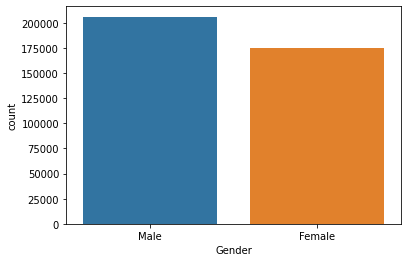

In [68]:
sns.countplot(x="Gender", data= data)

<AxesSubplot:ylabel='Gender'>

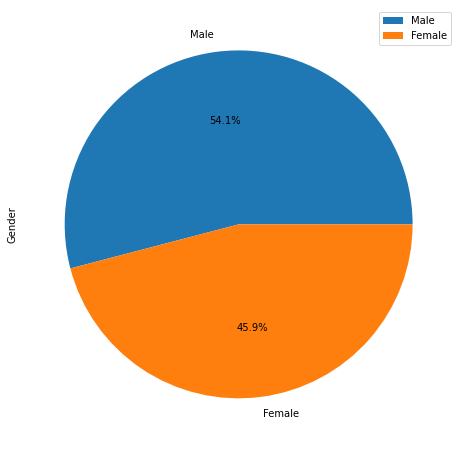

In [69]:
plt.figure(figsize=(12,8))
data.Gender.value_counts().plot(kind="pie", autopct="%1.1f%%", legend=True)

la Clientèle de notre assurance est dominée en majorité par des hommes , avec 54,1%

## Distribution du genre(Gender) en fonction  de l'assurance automobile (Response = 1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

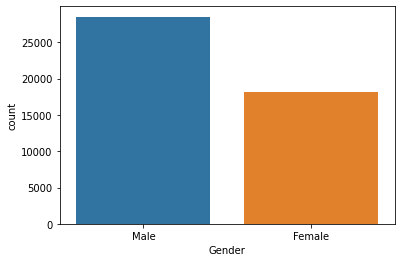

In [70]:
sns.countplot(x="Gender", data= data[data.Response == 1])

<AxesSubplot:ylabel='Gender'>

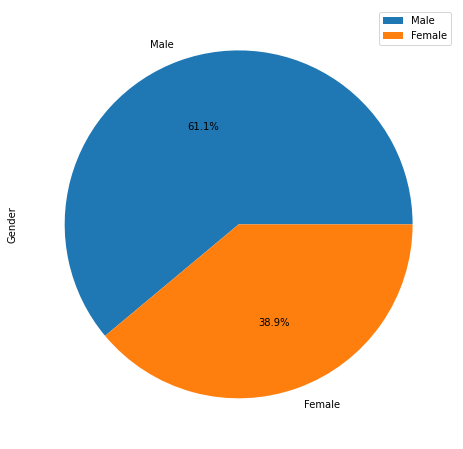

In [71]:
plt.figure(figsize=(12,8))
data[data.Response == 1].Gender.value_counts().plot(kind="pie", autopct="%1.1f%%", legend=True)

Nous constatons que 61,1% des personnes ayant acceptés l'assurance automobile sont des hommes (Male)

## Distribution de l'age de la voiture(Vehicle_Age)  en fonction de l'acceptation de l'assurance automobile (Response = 1)

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

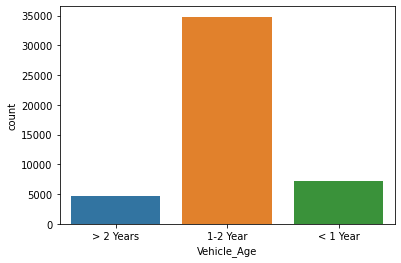

In [72]:
sns.countplot(x="Vehicle_Age", data= data[data.Response == 1])

<AxesSubplot:ylabel='Vehicle_Age'>

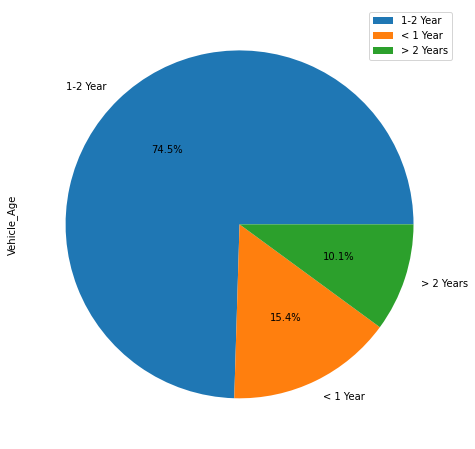

In [73]:
plt.figure(figsize=(12,8))
data[data.Response == 1].Vehicle_Age.value_counts().plot(kind="pie", autopct="%1.1f%%", legend=True)

74,5% des clients ayant acceptés l'assurance automobile ont un vehicule qu'ils possedent depuis 1 a 2 ans 

## Distribution d'une eventuelle panne (Vehicle_Damage) en fonction de l'acceptation de l'assurance automobile (Response = 1)

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

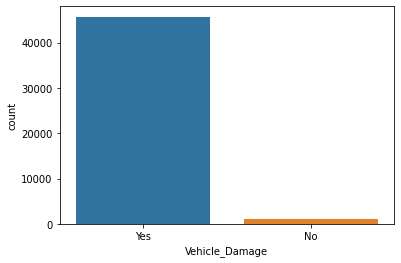

In [74]:
sns.countplot(x="Vehicle_Damage", data= data[data.Response == 1])

<AxesSubplot:ylabel='Vehicle_Damage'>

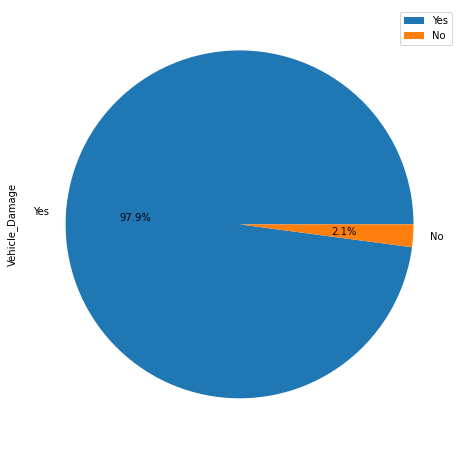

In [75]:
plt.figure(figsize=(12,8))
data[data.Response == 1].Vehicle_Damage.value_counts().plot(kind="pie", autopct="%1.1f%%", legend=True)

97,1% des personnes ayant acceptés l'assurance ont eu leur véhicule endommagé dans le passé

## Distribution d'une precedente assurance (Previously_Insured) en fonction de l'acceptation de l'assurance automobile (Response = 1)

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

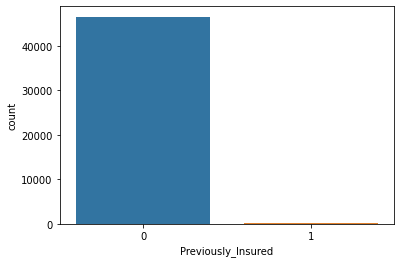

In [76]:
sns.countplot(x="Previously_Insured", data= data[data.Response == 1])

<AxesSubplot:ylabel='Previously_Insured'>

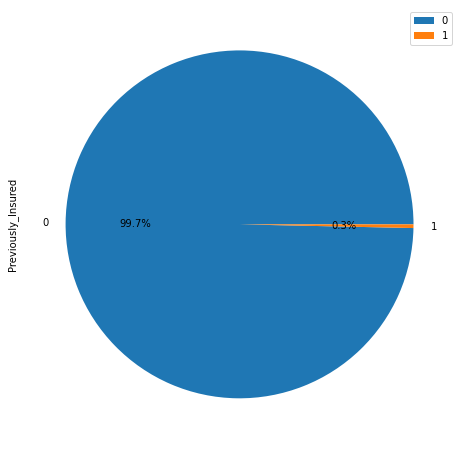

In [77]:
plt.figure(figsize=(12,8))
data[data.Response == 1].Previously_Insured.value_counts().plot(kind="pie", autopct="%1.1f%%", legend=True)

99,7% des personnes ayant accepté l'assurance automobile n'ont pas d'assurance sur leurs vehicules

## Numerisons les colonne de type Objet pour une meilleur manipulations

In [78]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Nous constatons 3 colonnes de type objet: Gender,Vehicle_Damage et Vehicle_Age  

## Utilisons la fonction LabelEncoder() de sklearn pour numeriser nos colonnes 

In [79]:

encoder=LabelEncoder()
data.Gender=encoder.fit_transform(data.Gender)
data.Vehicle_Damage=encoder.fit_transform(data.Vehicle_Damage)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


La colonne Vehicule_Age etant un peu particuliere car l'ordre des variables n'etant pas le bon , nous devons le faire nous meme 

In [81]:
vehicle_age={"< 1 Year": 0,'1-2 Year':1,'> 2 Years':2}
data["Vehicle_Age"]=data["Vehicle_Age"].replace(vehicle_age)

In [82]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


## Verifions la correlations des differentes colonnes afin de choisir les plus pertinentes 

<AxesSubplot:>

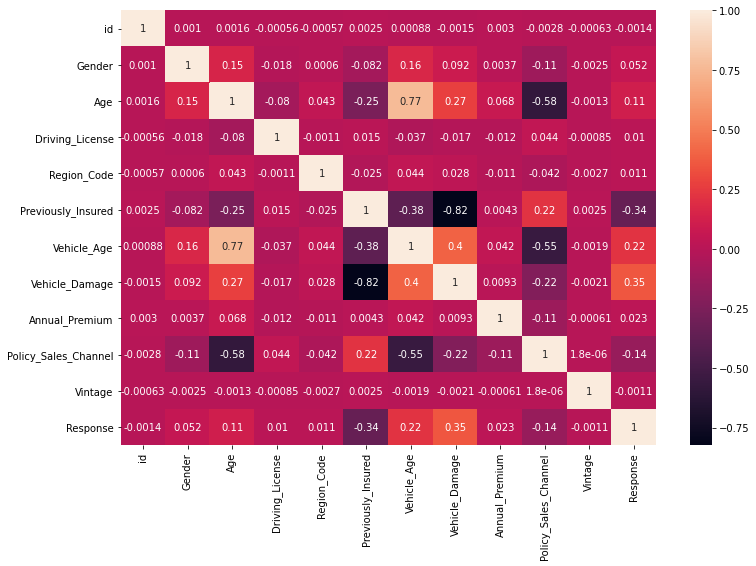

In [83]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

### Rappelons qu'une correlation negative est nuisible a notre prediction 
### Ainsi nous supprimons:
###    - Age: car etant deja lie a Vehicule_Age
###    - Vehicule_Damage: car etant fortement lie a Vehicule_Age et a Age
###    - id : car sa correlation est negative 
###    - Vintage
###    - Policy_Sales_Channel

In [85]:
data=data.drop(columns=['Vehicle_Damage',"Age","id", 'Vintage', 'Policy_Sales_Channel'],axis=1,inplace=False)

KeyError: "['Vehicle_Damage' 'Age' 'id' 'Vintage' 'Policy_Sales_Channel'] not found in axis"

In [86]:
data

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Response
0,1,1,28.0,0,2,40454.0,1
1,1,1,3.0,0,1,33536.0,0
2,1,1,28.0,0,2,38294.0,1
3,1,1,11.0,1,0,28619.0,0
4,0,1,41.0,1,0,27496.0,0
...,...,...,...,...,...,...,...
381104,1,1,26.0,1,1,30170.0,0
381105,1,1,37.0,1,0,40016.0,0
381106,1,1,30.0,1,0,35118.0,0
381107,0,1,14.0,0,2,44617.0,0


# Separons nos Dataset et X et y 

In [87]:
X = data.drop('Response', axis = 1).values
y = data['Response'].values

# Separtation des données en 2 groupes dont train et test

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normalisations des données pour une meilleur application du model  

In [89]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Appliquons le Model Logistic

In [159]:
# Entrainement par le model logistic
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression( max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
# Prediction et evaluation du model logistic
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train, cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.8780236614882136
Training set:  0.8780236612253064
Test set:  0.8750360788223872


In [133]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

# Appliquons le DecisionTreeClassifier

In [93]:
# entrainement par DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=400,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=33, splitter='best')

In [94]:
# Prediction et evaluation du model d'arbre decisionnel(DecisionTreeClassifier)
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train, cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)


CV:  0.8768100972257684
Training set:  0.8795160174097288
Test set:  0.8736191650704521


In [95]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]

tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

# Appliquons le Xgboost

In [96]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [97]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
y_pred = xgb_model.predict(X_train_scaled)

In [99]:
scores = cross_val_score(xgb_model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)

In [100]:
accuracy_score(y_train, y_pred)

0.8784828477435902

In [101]:
y_pred_xb_test = xgb_model.predict(X_test_scaled)

In [102]:
# Prediction et evaluation du model xgboost
cv_xb = cross_val_score(estimator = xgb_model, X = X_train_scaled, y = y_train, cv = 10)
print("CV: ", cv_xb.mean())

y_pred_xb_train = xgb_model.predict(X_train_scaled)
accuracy_xb_train = accuracy_score(y_train, y_pred_xb_train)
print("Training set: ", accuracy_dt_train)

y_pred_xb_test = xgb_model.predict(X_test_scaled)
accuracy_xb_test = accuracy_score(y_test, y_pred_xb_test)
print("Test set: ", accuracy_dt_test)


CV:  0.8778367065575973
Training set:  0.8795160174097288
Test set:  0.8736191650704521


In [103]:
tp_xb = confusion_matrix(y_test, y_pred_xb_test)[0,0]
fp_xb = confusion_matrix(y_test, y_pred_xb_test)[0,1]
tn_xb = confusion_matrix(y_test, y_pred_xb_test)[1,1]
fn_xb = confusion_matrix(y_test, y_pred_xb_test)[1,0]

## VISUALISATION DES PERFORMANCES DES DIFFERENTS MODELS

In [104]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('xgboost', tp_xb, fp_xb, tn_xb, fn_xb, accuracy_xb_train, accuracy_xb_test, cv_xb.mean())
         ]

In [105]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])

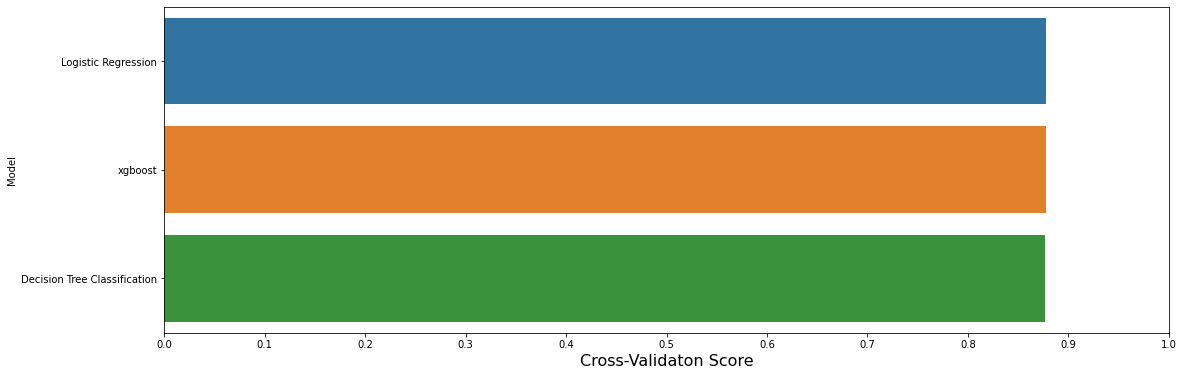

In [106]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

# Nos 3 models nous donnent un scores sensiblement identique avec une leger avantage pour le model logistic (0,875) de score sur le Test , soit 87,5% de precision

# Exportation du modele selectionné

In [150]:
filename = 'logistic_model.sav'
pickle.dump(classifier_lr, open(filename, 'wb'))

# Chargement du model et du fichier Test

In [151]:
loaded_model = pickle.load(open(filename, 'rb'))

In [157]:
result = loaded_model.score(X_test_scaled, y_test)

In [158]:
result

0.8750360788223872